# Susan Catanoso
DSSA 5104 - Data Analytics
Week 10 Task 1
Prepare a Python code using Keras to solve our toy problem

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# read in the data using numpy
features_and_targets = np.loadtxt('features_and_targets.csv',delimiter=',')
print(features_and_targets)
np.random.shuffle(features_and_targets)

X = features_and_targets[:,0:5]      # create features matrix X which are the inputs
Y = features_and_targets[:,5:7]      # create target matrix Y which are what is being predicted

np.random.seed(12)                    # set the random seed so every time it is run, the same data is used

Using TensorFlow backend.


[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 1. 1. 1. 0.]]


In [2]:
# Train the model over 150 epochs 
training_iteration = 150

model = Sequential()          # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(4, input_dim = 5, activation = 'relu'))  # connects densely (all nodes connect to every node in the next layer) 5 inputs to next layer of 4 neurons; uses ReLU activation
model.add(Dense(3, activation = 'relu'))              # create next level of neural network with 3 neurons - no input layer, just prior layer; uses ReLU activation
model.add(Dense(2, activation = 'sigmoid'))           # create next level of neural network with 2 neurons - no input layer; uses Sigmoid activation

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])  # loss is the loss function; optimizer determines the learning rate
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)      # generate the model with X as input and Y as the result; will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create an object with the history of the iterations
score = model.evaluate(X,Y)       # assigns the loss and acc of the model to a list

print((model.metrics_names[1], score[1]*100))

predicted_targets = model.predict(X)

for i in range(22):
    print('Predicted: ', predicted_targets[i,:], 'Observed: ', Y[i,:])

22/22 [==============================] - 0s 1ms/step
('acc', 63.63636255264282)
Predicted:  [0.43207863 0.6052549 ] Observed:  [1. 0.]
Predicted:  [0.4701753 0.5311694] Observed:  [0. 1.]
Predicted:  [0.30692455 0.6681946 ] Observed:  [0. 1.]
Predicted:  [0.4701753 0.5311694] Observed:  [0. 1.]
Predicted:  [0.4701753 0.5311694] Observed:  [0. 1.]
Predicted:  [0.4701753 0.5311694] Observed:  [1. 0.]
Predicted:  [0.4701753 0.5311694] Observed:  [0. 1.]
Predicted:  [0.41228288 0.5637357 ] Observed:  [0. 1.]
Predicted:  [0.4701753 0.5311694] Observed:  [1. 0.]
Predicted:  [0.4701753 0.5311694] Observed:  [1. 0.]
Predicted:  [0.4701753 0.5311694] Observed:  [0. 1.]
Predicted:  [0.4701753 0.5311694] Observed:  [1. 0.]
Predicted:  [0.30564308 0.6815473 ] Observed:  [0. 1.]
Predicted:  [0.4701753 0.5311694] Observed:  [1. 0.]
Predicted:  [0.30276632 0.68056   ] Observed:  [0. 1.]
Predicted:  [0.336673  0.6143467] Observed:  [0. 1.]
Predicted:  [0.26443106 0.7314523 ] Observed:  [0. 1.]
Predict

In [3]:
type(model_epochdata)      # this is an object

print(model_epochdata.history)    # This prints the contents of the object

accuracy = model_epochdata.history['acc']    #  Assigns the acc numbers to a list
loss = model_epochdata.history['loss']       #  Assigns the loss numbers to a list
type(accuracy)
type(loss)
print("Model Accuracy per epoch is: ", accuracy)
print("Model Loss per epoch is:  ", loss)

{'loss': [0.24368663132190704, 0.2435043901205063, 0.2433224618434906, 0.24314022064208984, 0.24296864867210388, 0.24279317259788513, 0.24260926246643066, 0.24242867529392242, 0.2422436773777008, 0.24205970764160156, 0.24187716841697693, 0.24169474840164185, 0.24151088297367096, 0.2413252294063568, 0.24113816022872925, 0.24095092713832855, 0.24076128005981445, 0.24057208001613617, 0.24038191139698029, 0.240190789103508, 0.23999668657779694, 0.2398013472557068, 0.23960186541080475, 0.2394033968448639, 0.2392013967037201, 0.239000603556633, 0.23879867792129517, 0.2385932356119156, 0.2383897304534912, 0.238182932138443, 0.23797698318958282, 0.23776721954345703, 0.23755906522274017, 0.2373504638671875, 0.2371407449245453, 0.2369275540113449, 0.23671568930149078, 0.23650270700454712, 0.23628872632980347, 0.23607362806797028, 0.23585821688175201, 0.23563943803310394, 0.23542165756225586, 0.2352004200220108, 0.234979048371315, 0.2347567230463028, 0.2345402091741562, 0.23431994020938873, 0.234

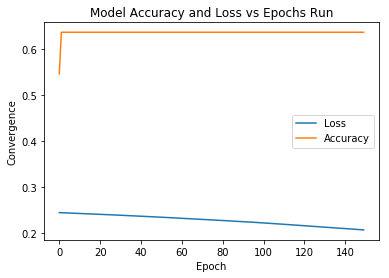

In [4]:
# Plot accuracy and loss vs epoch

plt.plot(loss,label='Loss')
plt.plot(accuracy, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend()
plt.title("Model Accuracy and Loss vs Epochs Run")
plt.show()


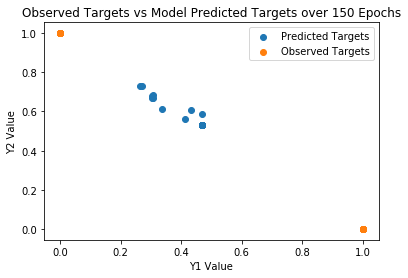

In [5]:
# Create a visualization showing predicted vs observed targets
plt.scatter(predicted_targets[:,0],predicted_targets[:,1], label = "Predicted Targets")
plt.scatter(Y[:,0],Y[:,1], label = "Observed Targets")
plt.xlabel('Y1 Value')
plt.ylabel('Y2 Value')
plt.legend()
plt.title('Observed Targets vs Model Predicted Targets over 150 Epochs')
plt.show()

In [6]:
# Re-train the model over 500 epochs 
training_iteration = 500

model = Sequential()          # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(4, input_dim = 5, activation = 'relu'))  # connects densely (all nodes connect to every node in the next layer) 5 inputs to next layer of 4 neurons; uses ReLU activation
model.add(Dense(3, activation = 'relu'))              # create next level of neural network with 3 neurons - no input layer, just prior layer; uses ReLU activation
model.add(Dense(2, activation = 'sigmoid'))           # create next level of neural network with 2 neurons - no input layer; uses Sigmoid activation

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])  # loss is the loss function; optimizer determines the learning rate
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)      # generate the model with X as input and Y as the result; will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create an object with the history of the iterations
score = model.evaluate(X,Y)

print((model.metrics_names[1], score[1]*100))

predicted_targets = model.predict(X)

for i in range(22):
    print('Predicted: ', predicted_targets[i,:], 'Observed: ', Y[i,:])

22/22 [==============================] - 0s 2ms/step
('acc', 95.45454382896423)
Predicted:  [0.6398671  0.28502107] Observed:  [1. 0.]
Predicted:  [0.40684286 0.7720459 ] Observed:  [0. 1.]
Predicted:  [0.5002046  0.40524337] Observed:  [0. 1.]
Predicted:  [0.41990948 0.6693258 ] Observed:  [0. 1.]
Predicted:  [0.42425716 0.6811527 ] Observed:  [0. 1.]
Predicted:  [0.6822046  0.15724255] Observed:  [1. 0.]
Predicted:  [0.39167073 0.8179172 ] Observed:  [0. 1.]
Predicted:  [0.33902436 0.8377502 ] Observed:  [0. 1.]
Predicted:  [0.68004256 0.23483498] Observed:  [1. 0.]
Predicted:  [0.6494376  0.23358367] Observed:  [1. 0.]
Predicted:  [0.34661344 0.8874017 ] Observed:  [0. 1.]
Predicted:  [0.69820184 0.14113489] Observed:  [1. 0.]
Predicted:  [0.44925952 0.6465356 ] Observed:  [0. 1.]
Predicted:  [0.69112784 0.1481372 ] Observed:  [1. 0.]
Predicted:  [0.29952332 0.93072814] Observed:  [0. 1.]
Predicted:  [0.30966222 0.9126384 ] Observed:  [0. 1.]
Predicted:  [0.44507477 0.63352877] Obse

In [7]:
# Check the accuracy and loss of the model after increasing the epochs

accuracy2 = model_epochdata.history['acc']    #  Assigns the acc numbers to a list
loss2 = model_epochdata.history['loss']       #  Assigns the loss numbers to a list
#print("Model Accuracy per epoch is: ", accuracy2)
#print("Model Loss per epoch is:  ", loss2)

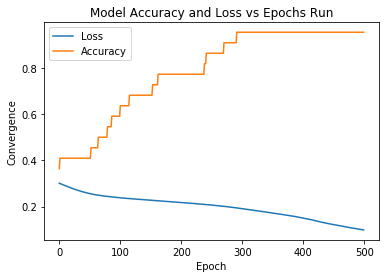

In [8]:
# Plot accuracy and loss vs epoch

plt.plot(loss2,label='Loss')
plt.plot(accuracy2, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend()
plt.title("Model Accuracy and Loss vs Epochs Run")
plt.show()


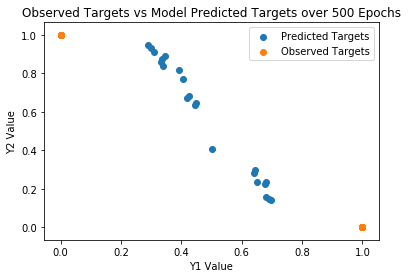

In [9]:
# Create a visualization showing predicted vs observed targets
plt.scatter(predicted_targets[:,0],predicted_targets[:,1], label = "Predicted Targets")
plt.scatter(Y[:,0],Y[:,1], label = "Observed Targets")
plt.xlabel('Y1 Value')
plt.ylabel('Y2 Value')
plt.legend()
plt.title('Observed Targets vs Model Predicted Targets over 500 Epochs')
plt.show()

In [10]:
# Re-train the model over 1500 epochs 
training_iteration = 1500

model = Sequential()          # Builds a model layer by layer.  Each layer has the weights corresponding to the layer it connects forward to
model.add(Dense(4, input_dim = 5, activation = 'relu'))  # connects densely (all nodes connect to every node in the next layer) 5 inputs to next layer of 4 neurons; uses ReLU activation
model.add(Dense(3, activation = 'relu'))              # create next level of neural network with 3 neurons - no input layer, just prior layer; uses ReLU activation
model.add(Dense(2, activation = 'sigmoid'))           # create next level of neural network with 2 neurons - no input layer; uses Sigmoid activation

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])  # loss is the loss function; optimizer determines the learning rate
model_epochdata = model.fit(X, Y, epochs = training_iteration, verbose = 0)      # generate the model with X as input and Y as the result; will run through "training_iteration" number of iterations 
                                                        # to improve the model; assigning the results to a variable will create an object with the history of the iterations
score = model.evaluate(X,Y)

print((model.metrics_names[1], score[1]*100))

predicted_targets = model.predict(X)

for i in range(22):
    print('Predicted: ', predicted_targets[i,:], 'Observed: ', Y[i,:])

22/22 [==============================] - 0s 2ms/step
('acc', 100.0)
Predicted:  [0.94197327 0.09062101] Observed:  [1. 0.]
Predicted:  [0.01912053 0.97631115] Observed:  [0. 1.]
Predicted:  [0.02483748 0.9396541 ] Observed:  [0. 1.]
Predicted:  [0.02430355 0.9706698 ] Observed:  [0. 1.]
Predicted:  [0.04252376 0.9519365 ] Observed:  [0. 1.]
Predicted:  [0.9453863  0.08550449] Observed:  [1. 0.]
Predicted:  [0.03358881 0.9610364 ] Observed:  [0. 1.]
Predicted:  [0.07442214 0.89603215] Observed:  [0. 1.]
Predicted:  [0.9801287  0.03582757] Observed:  [1. 0.]
Predicted:  [0.9843816  0.02897377] Observed:  [1. 0.]
Predicted:  [0.03214404 0.9625238 ] Observed:  [0. 1.]
Predicted:  [0.97103083 0.04936488] Observed:  [1. 0.]
Predicted:  [0.01667452 0.95090306] Observed:  [0. 1.]
Predicted:  [0.97363144 0.04576661] Observed:  [1. 0.]
Predicted:  [0.01915416 0.9405178 ] Observed:  [0. 1.]
Predicted:  [0.0192238 0.93967  ] Observed:  [0. 1.]
Predicted:  [0.02170532 0.94514906] Observed:  [0. 1.]

In [11]:
# Check the accuracy and loss of the model after increasing the epochs

accuracy3 = model_epochdata.history['acc']    #  Assigns the acc numbers to a list
loss3 = model_epochdata.history['loss']       #  Assigns the loss numbers to a list
#print("Model Accuracy per epoch is: ", accuracy3)
#print("Model Loss per epoch is:  ", loss3)

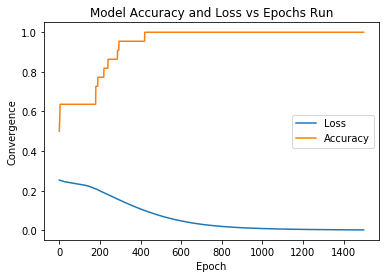

In [12]:
# Plot accuracy and loss vs epoch

plt.plot(loss3,label='Loss')
plt.plot(accuracy3, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Convergence')
plt.legend()
plt.title("Model Accuracy and Loss vs Epochs Run")
plt.show()


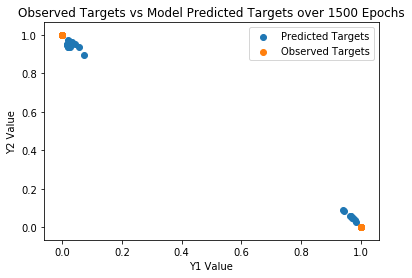

In [13]:
# Create a visualization showing predicted vs observed targets
plt.scatter(predicted_targets[:,0],predicted_targets[:,1], label = "Predicted Targets")
plt.scatter(Y[:,0],Y[:,1], label = "Observed Targets")
plt.xlabel('Y1 Value')
plt.ylabel('Y2 Value')
plt.legend()
plt.title('Observed Targets vs Model Predicted Targets over 1500 Epochs')
plt.show()

# Conclusion

The model got better with more epochs.  You can see in the graphs of predicted vs observed how the data moved from the center closer to the actual values.  I played with setting the seed with various numbers and the results were all similar - 150 epochs, graph of predicted was mostly bunched in the middle; 500 epochs, it moved closer to the 1's, and at 1,500 epochs, it was almost all on the same observed values.  From the graphs, you could also see a decreasing loss.  In the above example, it seemed to level off at about 800 epochs even though accuracy hit 100% shortly after 500 epochs.  


In [14]:
# Run this command to see if Tensorflow has detected a GPU to use
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15779409647067210925
]
